# Decision Tree

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL_over-dataset.csv",sep='\t',decimal=",",index_col=0)

In [46]:
df.head()

,Imax,E,PIL,Mt,TsW,NbxW,MeanD,Eday_of_week,class
0,12,4.335643,2.567,18.202218,100.627358,0.641509,0.000000,0.845790,0
1,32,6.503112,2.567,18.970947,60.492264,0.169811,35.000000,1.942764,1
2,360,6.504979,2.752,28.764242,125.368679,0.283019,24.266667,2.396410,1
3,80,4.494680,2.567,33.866071,17.891509,0.094340,55.400000,1.177965,0
4,32,0.000000,2.567,292.000000,16.528302,0.056604,13.000000,0.918296,1


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.20)

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Grid Search

In [49]:

grid_params={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,5,10,15,20,25,30,35,40],
    'min_samples_split':[2,5,10,15,20,25],
    'min_samples_leaf':[1,3,5,10,15,20,25],
    'min_impurity_decrease':[0,0.1,0.2,0.3,0.4,0.5]
}


gs=GridSearchCV(DecisionTreeClassifier(),grid_params,verbose=1,n_jobs=3,scoring='accuracy')
gs.fit(train_set,train_label)


print("Complete Grid search:")
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

print("Best Score: ",gs.best_score_)
print("Best Params: ",gs.best_params_)

 'random'}
0.333 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 40, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 10, 'min_samples_split': 25, 'splitter': 'best'}
0.333 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 40, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 10, 'min_samples_split': 25, 'splitter': 'random'}
0.333 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 40, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'best'}
0.333 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 40, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'random'}
0.333 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 40, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 15, 'min_samples_split': 5, 'splitter': 'best'}
0.333 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 40, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 15, 'min_samples_split': 5, 'splitter': 'random'}
0.333 (+/-0.000

## Modello Finale

In [50]:
#define a decision tree and fit it

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 25, min_impurity_decrease= 0, min_samples_leaf= 3, min_samples_split= 2, splitter='best')
dt = dt.fit(train_set, train_label)

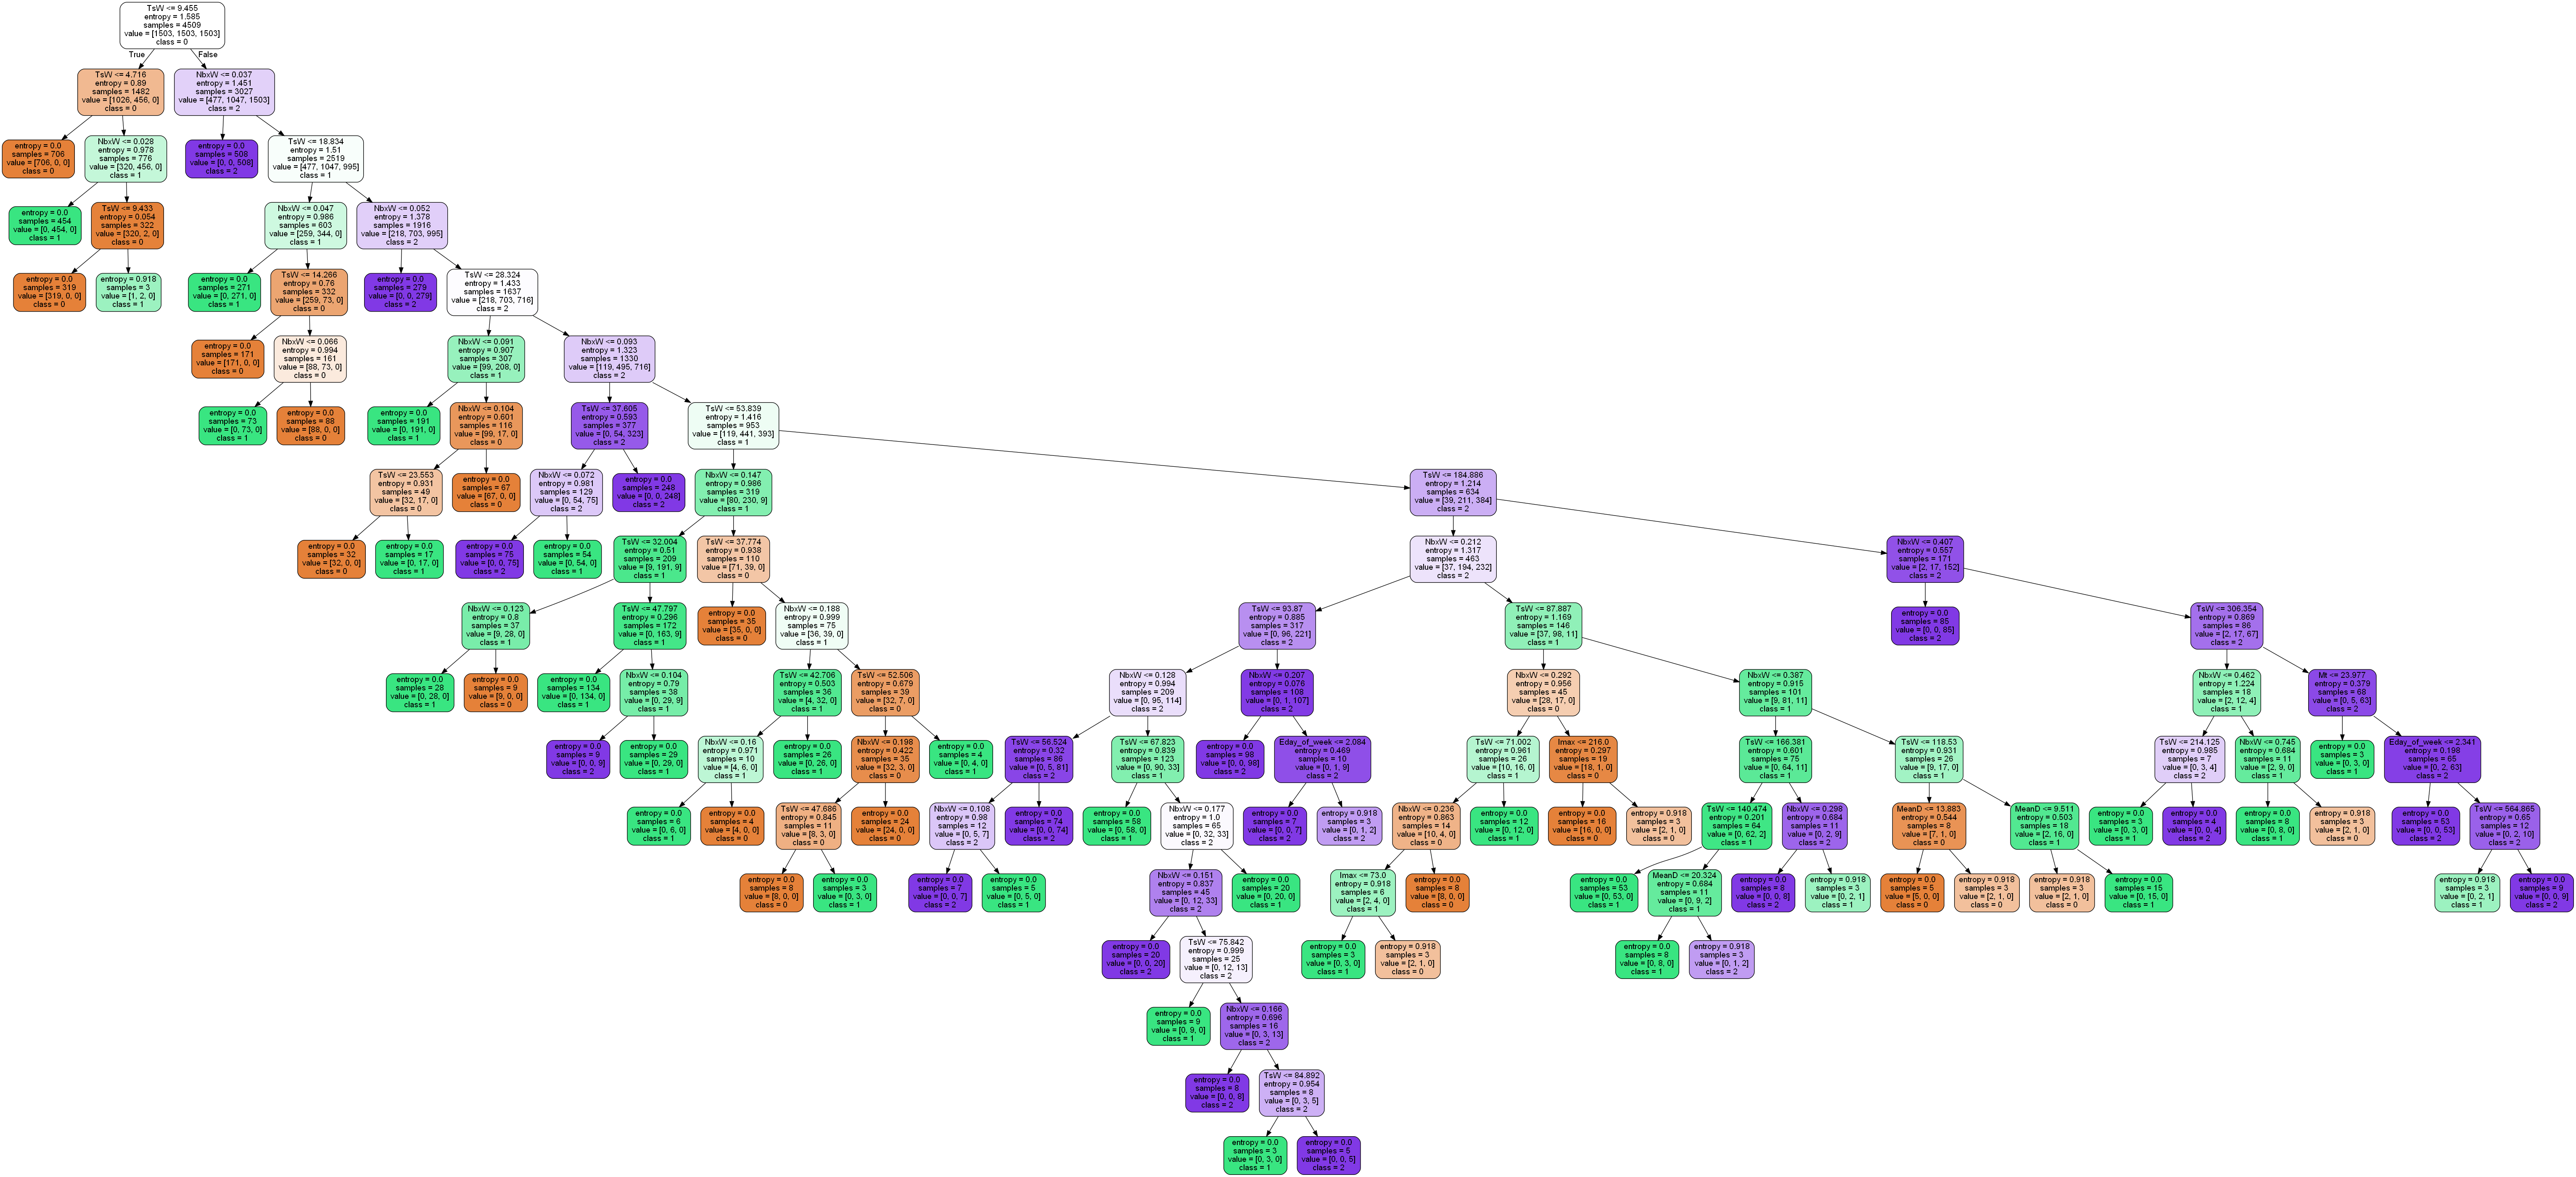

In [51]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image, display



dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set.columns),  
                         class_names=['0','1','2'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=800, height=500)


In [52]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

graph = Source(dot_data)
graph.format = 'png'
graph.render('dtree_render',view=True)


'dtree_render.png'

In [53]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_label, 
                            test_pred_dt, 
                            target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       376
           1       0.98      0.99      0.99       376
           2       1.00      0.98      0.99       376

    accuracy                           0.99      1128
   macro avg       0.99      0.99      0.99      1128
weighted avg       0.99      0.99      0.99      1128



In [55]:
#compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_pred_dt)
cm

array([[374,   2,   0],
       [  2, 373,   1],
       [  0,   6, 370]], dtype=int64)

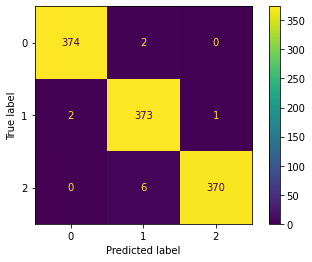

In [56]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(dt, test_set, test_label)
plt.show() 

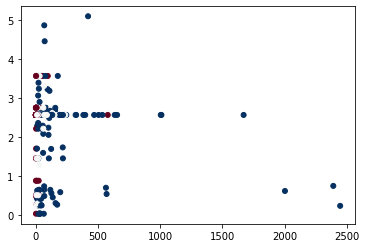

In [57]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_label.values, s=25, cmap='RdBu');

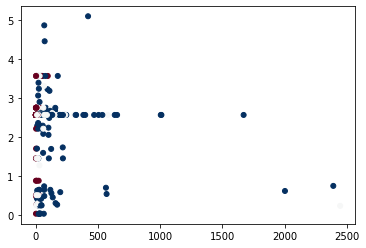

In [58]:
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_pred_dt, s=25, cmap='RdBu');

In [59]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  0.9977822133510756
Accuracy test set  0.9902482269503546
Precision train set  0.9977833812515504
Recall train set  0.9977822133510756
F1 score train set  0.9977816199791041
Support train set  (array([0.99668215, 0.99799867, 0.99866933]), array([0.99933466, 0.99534265, 0.99866933]), array([0.99800664, 0.99666889, 0.99866933]), array([1503, 1503, 1503], dtype=int64))


In [60]:
#cross validation
#the score array for test/train scores on each cv split
#the time for fitting/scoring the estimator on the train set for each cv split
from sklearn.model_selection import cross_validate
import statistics 
scores = cross_validate(dt, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.014346122741699219
Score time  0.0016682147979736328
Test score  0.9824794854734974
Train score  0.9957862053670437
